<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Checking-out-Metadata" data-toc-modified-id="Checking-out-Metadata-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Checking out Metadata</a></span></li><li><span><a href="#General-EDA" data-toc-modified-id="General-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General EDA</a></span></li><li><span><a href="#Checking-out-Split" data-toc-modified-id="Checking-out-Split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Checking out Split</a></span></li><li><span><a href="#Checking-out-UID" data-toc-modified-id="Checking-out-UID-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking out UID</a></span></li><li><span><a href="#Checking-out-date" data-toc-modified-id="Checking-out-date-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Checking out date</a></span></li><li><span><a href="#splitting-the-data" data-toc-modified-id="splitting-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>splitting the data</a></span></li><li><span><a href="#Geopandas" data-toc-modified-id="Geopandas-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Geopandas</a></span></li><li><span><a href="#Moving-on-to-data" data-toc-modified-id="Moving-on-to-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Moving on to data</a></span></li><li><span><a href="#Lets-look-at-train-and-test-vs-time" data-toc-modified-id="Lets-look-at-train-and-test-vs-time-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Lets look at train and test vs time</a></span></li><li><span><a href="#Looking-at-each-year-for-seasonality" data-toc-modified-id="Looking-at-each-year-for-seasonality-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Looking at each year for seasonality</a></span><ul class="toc-item"><li><span><a href="#Train-Data" data-toc-modified-id="Train-Data-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Train Data</a></span></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Test Data</a></span></li><li><span><a href="#Barplot-of-annual-samples" data-toc-modified-id="Barplot-of-annual-samples-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Barplot of annual samples</a></span></li></ul></li><li><span><a href="#Lets-look-at-the-other-import" data-toc-modified-id="Lets-look-at-the-other-import-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Lets look at the other import</a></span></li><li><span><a href="#Sat-imagery" data-toc-modified-id="Sat-imagery-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Sat imagery</a></span></li></ul></div>

Running main notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point
import geopy.distance as distance

import planetary_computer as pc
from pystac_client import Client

from datetime import datetime
from datetime import timedelta

In [2]:
# pip install planetary_computer

## Checking out Metadata

- `uid` (str): unique ID for each row
- `latitude` (float): latitude of the location where the sample was collected
- `longitude` (float): longitude of the location where the sample was collected
- `date` (pd.datetime): date when the sample was collected, in the format YYYY-MM-DD
- `split` (str): indicates whether the row is part of the train set or the test set

In [3]:
# Reading in the data and bringing in date as datetime dtype
metadata = pd.read_csv('driven_data_HAB/metadata.csv', parse_dates=['date'])

In [4]:
metadata

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
1,aabn,36.559700,-121.510000,2016-08-31,test
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train
...,...,...,...,...,...
23565,zzvv,36.708500,-121.749000,2014-12-02,test
23566,zzwo,39.792190,-99.971050,2017-06-19,train
23567,zzwq,35.794000,-79.012551,2015-03-24,train
23568,zzyb,35.742000,-79.238600,2016-11-21,train


## General EDA

In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23570 entries, 0 to 23569
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uid        23570 non-null  object        
 1   latitude   23570 non-null  float64       
 2   longitude  23570 non-null  float64       
 3   date       23570 non-null  datetime64[ns]
 4   split      23570 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 920.8+ KB


## Checking out Split

In [6]:
metadata['split'].value_counts(normalize=True)

train    0.723801
test     0.276199
Name: split, dtype: float64

**OK, we've got 73% train and 27% test data**

## Checking out UID

In [7]:
metadata['uid'].value_counts().max()

1

**OK, confirmed these are unique identifiers**

## Checking out date

In [8]:
metadata['date'].value_counts()

2016-08-10    146
2015-07-07    112
2015-06-22    103
2015-08-24    103
2016-05-24     99
             ... 
2017-02-10      1
2018-04-30      1
2019-10-25      1
2014-09-17      1
2013-12-08      1
Name: date, Length: 1637, dtype: int64

## splitting the data

In [9]:
X_train = metadata[metadata['split'] == 'train']

In [10]:
X_test = metadata[metadata['split'] == 'test']

## Geopandas

Testing geopandas to see how it works

In [11]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [12]:
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [13]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
world.shape

(177, 6)

In [15]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [16]:
cities.shape

(243, 2)

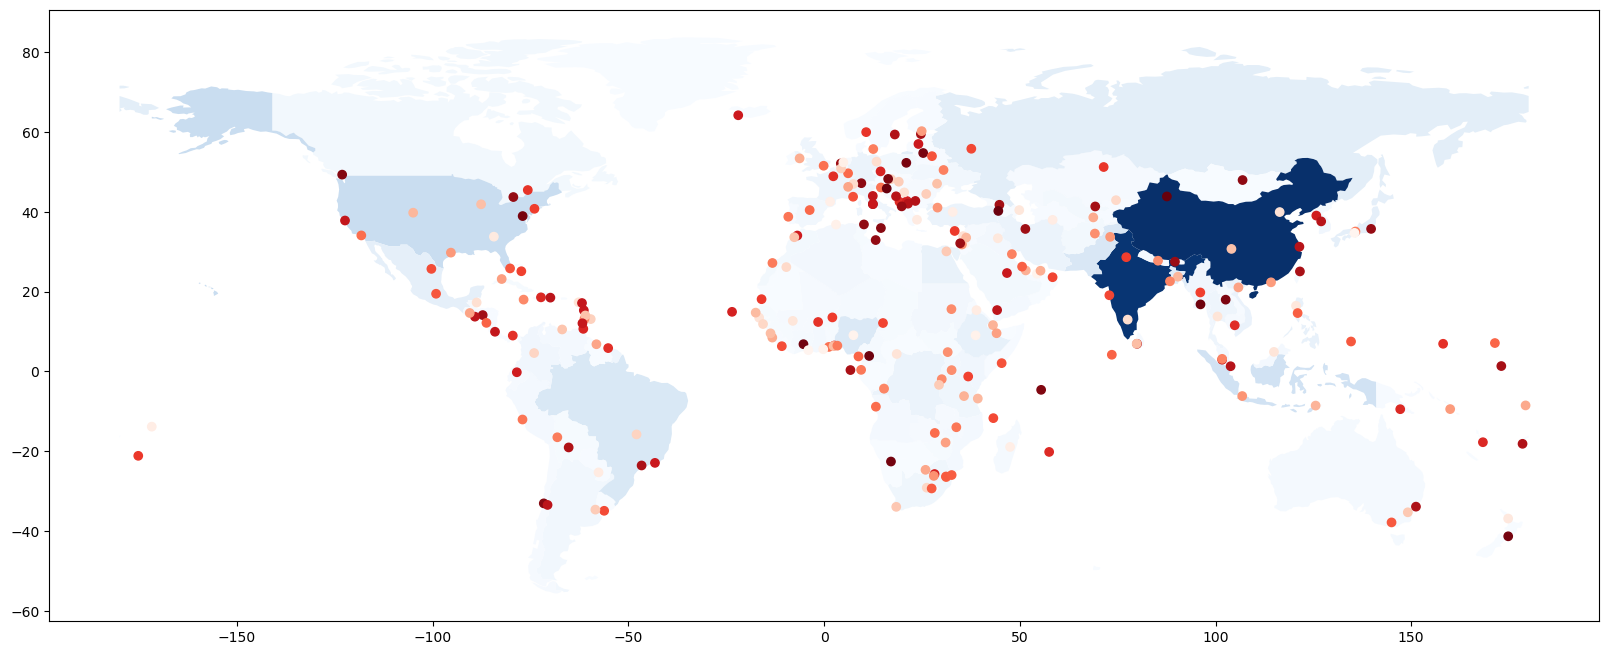

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
world[world['name'] != 'Antarctica'].plot('pop_est', ax=ax, cmap="Blues")
cities.plot('name', ax=ax, cmap="Reds");

**OK, just mapped the earth and its cities. Let's try using my data now**

## Moving on to data

In [18]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

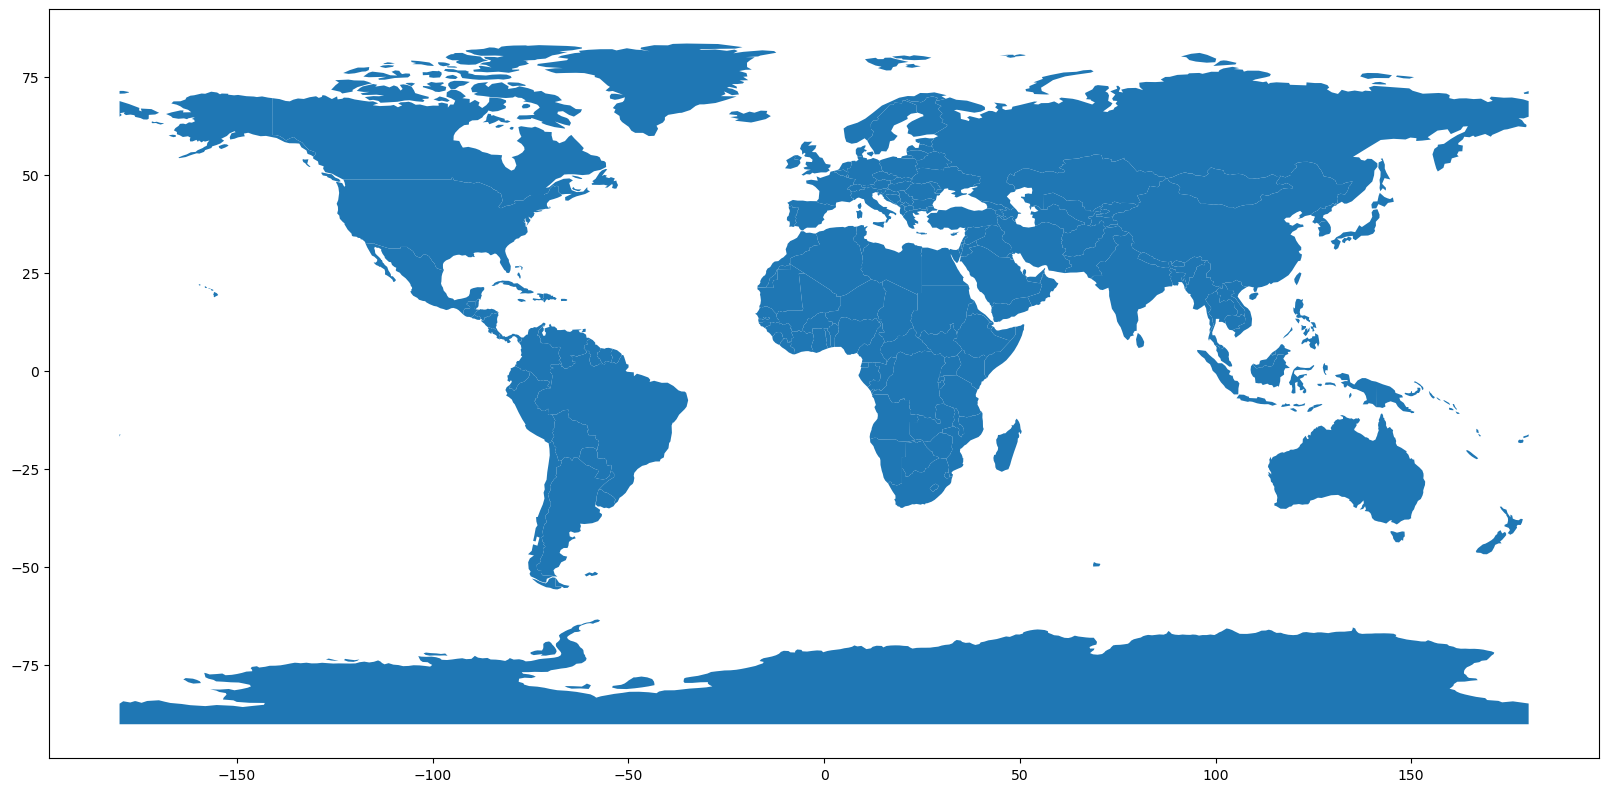

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
world_map = world.plot(ax=ax)

In [20]:
X_train_geo_df = gpd.GeoDataFrame(X_train, geometry=gpd.points_from_xy(X_train['longitude'], X_train['latitude']))

In [21]:
X_train_geo_df.head()

,uid,latitude,longitude,date,split,geometry
0,aabm,39.080319,-86.430867,2018-05-14,train,POINT (-86.43087 39.08032)
2,aacd,35.875083,-78.878434,2020-11-19,train,POINT (-78.87843 35.87508)
3,aaee,35.487000,-79.062133,2016-08-24,train,POINT (-79.06213 35.48700)
4,aaff,38.049471,-99.827001,2019-07-23,train,POINT (-99.82700 38.04947)
5,aafl,39.474744,-86.898353,2021-08-23,train,POINT (-86.89835 39.47474)


In [22]:
X_test_geo_df = gpd.GeoDataFrame(X_test, geometry=gpd.points_from_xy(X_test['longitude'], X_test['latitude']))

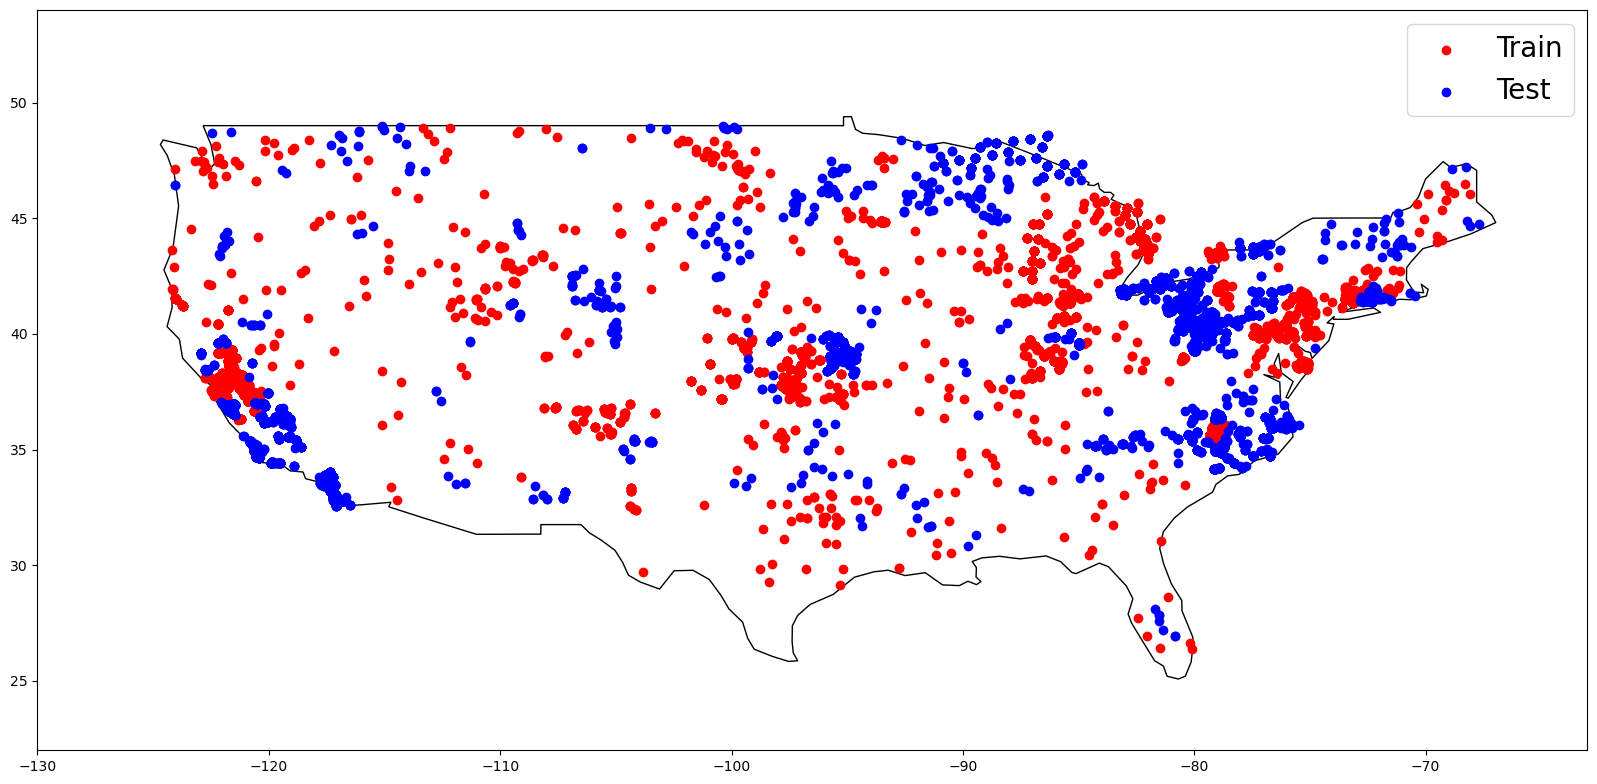

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
USA_map = world[world['name'] == 'United States of America'].plot(ax=ax, color='white', edgecolor='black')
X_train_geo_df.plot(ax=ax, c='r', label='Train')
X_test_geo_df.plot(ax=ax, c='b', label='Test')

ax.set_xlim([-130, -63])
ax.set_ylim([22, 54])
ax.legend(fontsize =20);

## Lets look at train and test vs time

Setting index for train data

In [24]:
X_train.head()

,uid,latitude,longitude,date,split,geometry
0,aabm,39.080319,-86.430867,2018-05-14,train,POINT (-86.43087 39.08032)
2,aacd,35.875083,-78.878434,2020-11-19,train,POINT (-78.87843 35.87508)
3,aaee,35.487000,-79.062133,2016-08-24,train,POINT (-79.06213 35.48700)
4,aaff,38.049471,-99.827001,2019-07-23,train,POINT (-99.82700 38.04947)
5,aafl,39.474744,-86.898353,2021-08-23,train,POINT (-86.89835 39.47474)


In [25]:
X_train = X_train.set_index('date')

In [26]:
X_train.sort_index(inplace=True)

In [27]:
X_train

,uid,latitude,longitude,split,geometry
date,,,,,
2013-01-04,fwbt,44.850500,-93.515700,train,POINT (-93.51570 44.85050)
2013-01-04,guny,44.878889,-93.490833,train,POINT (-93.49083 44.87889)
2013-01-04,gdxr,44.877646,-93.557842,train,POINT (-93.55784 44.87765)
2013-01-04,paev,44.822478,-93.367962,train,POINT (-93.36796 44.82248)
2013-01-04,evep,44.847993,-93.476318,train,POINT (-93.47632 44.84799)
...,...,...,...,...,...
2021-12-14,tobi,36.030000,-78.705932,train,POINT (-78.70593 36.03000)
2021-12-14,mdcu,35.980000,-78.843884,train,POINT (-78.84388 35.98000)
2021-12-14,hkvs,36.030000,-78.706429,train,POINT (-78.70643 36.03000)


In [28]:
X_train_months = X_train.groupby(pd.Grouper(freq = 'MS')).count()

In [29]:
train_roll_mean = X_train_months['split'].rolling(window=12).mean()

Setting index for test data

In [30]:
X_test = X_test.set_index('date')

In [31]:
X_test.sort_index(inplace=True)

In [32]:
X_test.head()

,uid,latitude,longitude,split,geometry
date,,,,,
2013-01-08,howw,37.0062,-120.600,test,POINT (-120.60000 37.00620)
2013-01-08,eamn,36.9818,-120.221,test,POINT (-120.22100 36.98180)
2013-01-08,imsv,36.9836,-120.500,test,POINT (-120.50000 36.98360)
2013-01-25,wgxq,33.8011,-117.205,test,POINT (-117.20500 33.80110)
2013-01-25,rsos,33.8892,-117.562,test,POINT (-117.56200 33.88920)


In [33]:
X_test_months = X_test.groupby(pd.Grouper(freq = 'MS')).count()

In [34]:
X_test_months.head(3)

,uid,latitude,longitude,split,geometry
date,,,,,
2013-01-01,11,11,11,11,11
2013-02-01,27,27,27,27,27
2013-03-01,40,40,40,40,40


In [35]:
test_roll_mean = X_test_months['split'].rolling(window=12).mean()

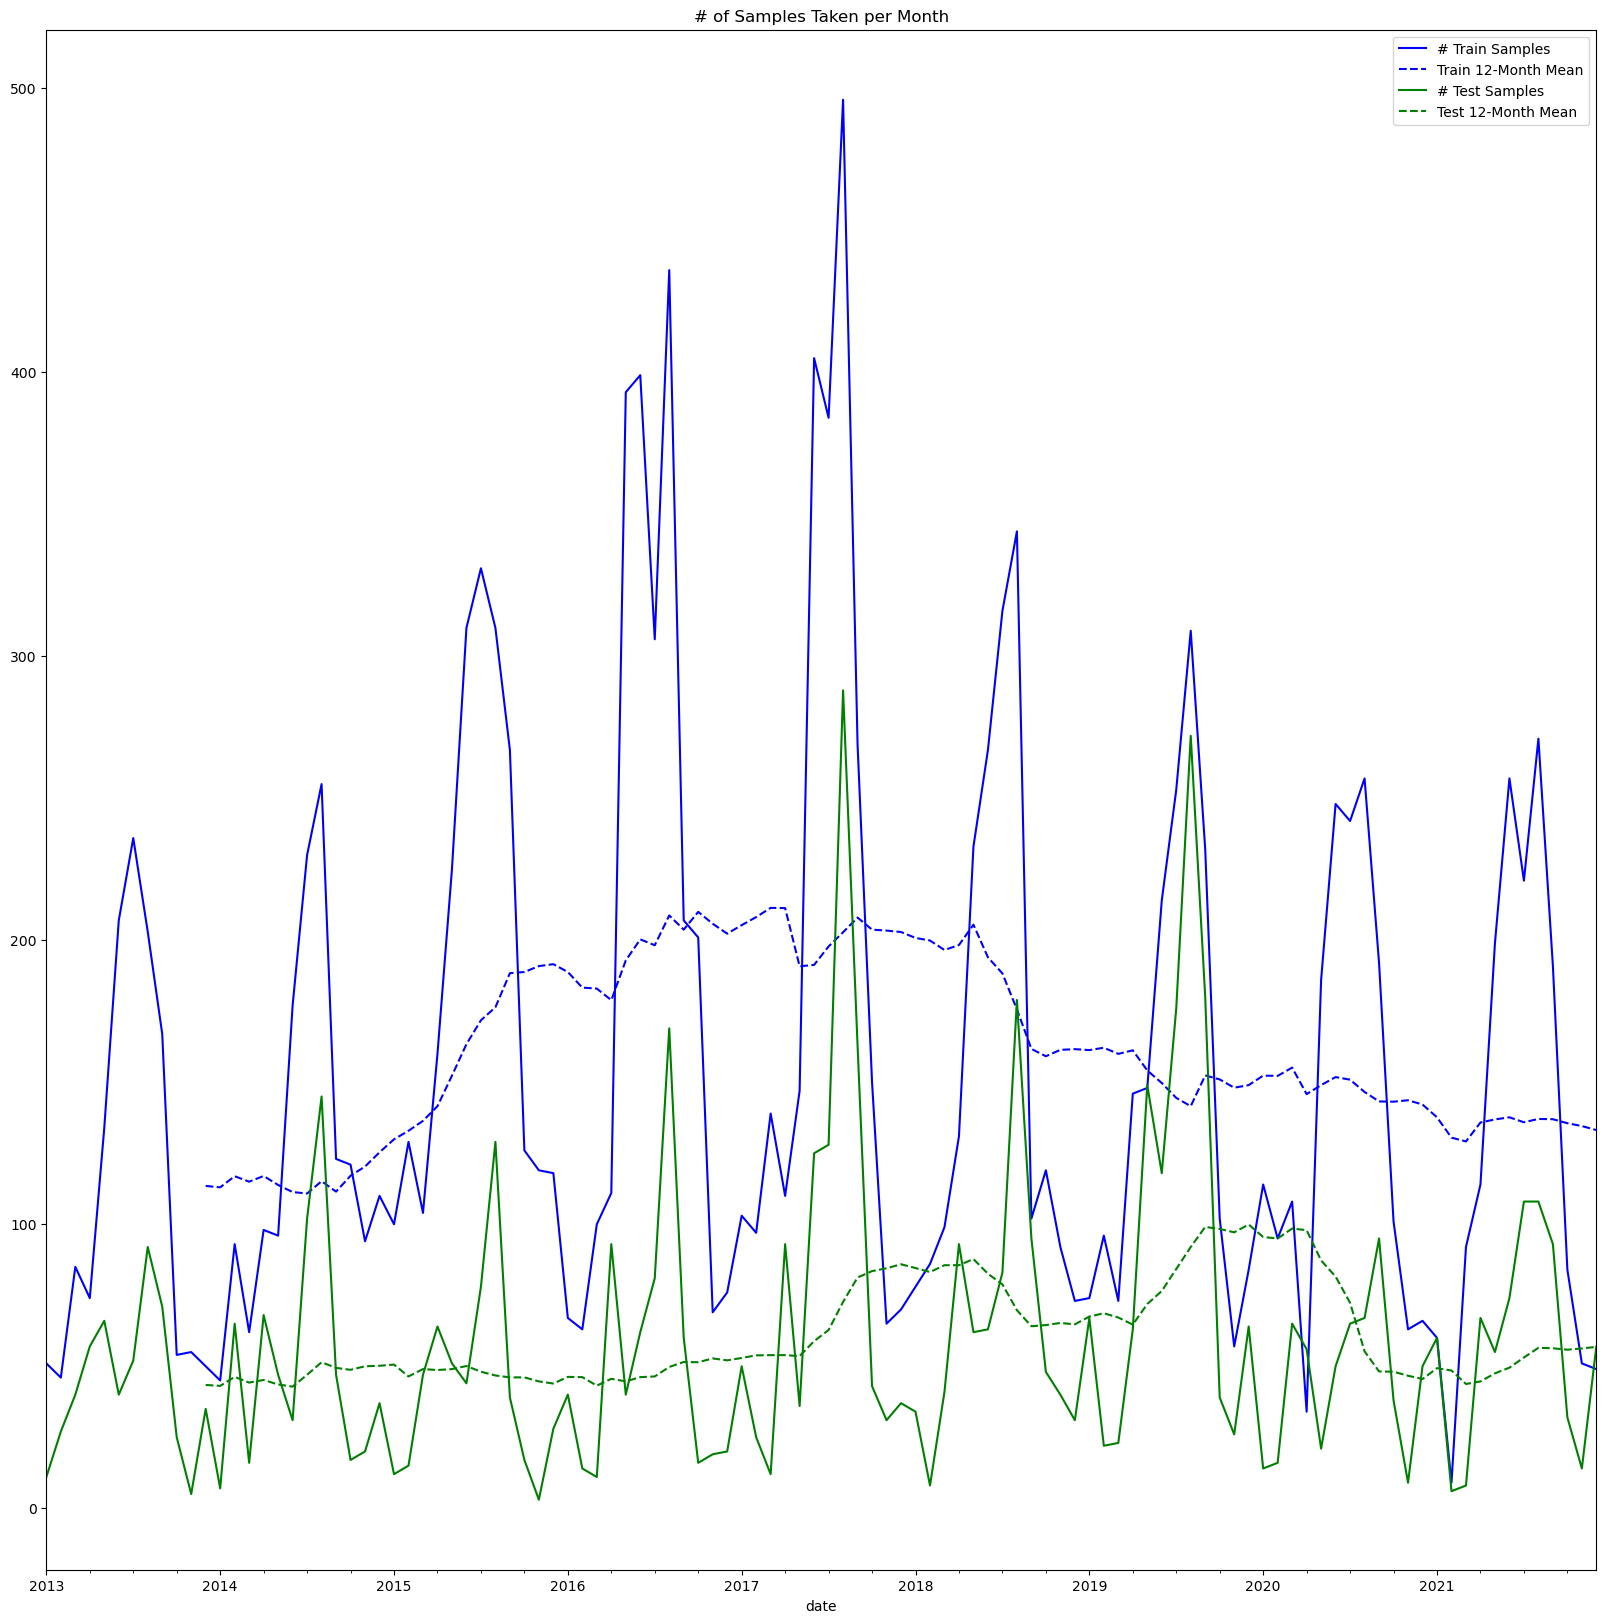

In [36]:
fig, ax= plt.subplots(figsize=(20,20))
# train data
X_train_months.plot(y='split', ax=ax, label='# Train Samples', style='b')
train_roll_mean.plot(ax=ax, label='Train 12-Month Mean', style='--b')

# test data
X_test_months.plot(y='split', ax=ax, label='# Test Samples', style='g')
test_roll_mean.plot(ax=ax, label='Test 12-Month Mean', style='--g')

ax.set_title('# of Samples Taken per Month')
ax.legend();

Similar sampling patterns in training and test data. High seasonality.

In [37]:
X_train.head(1)

,uid,latitude,longitude,split,geometry
date,,,,,
2013-01-04,fwbt,44.8505,-93.5157,train,POINT (-93.51570 44.85050)


In [38]:
X_train.tail(1)

,uid,latitude,longitude,split,geometry
date,,,,,
2021-12-14,zoaj,36.06,-78.76,train,POINT (-78.76000 36.06000)


First Sample date in January 4th, 2013.

Last Sample date is December 14th, 2021.

In [39]:
X_test.head(1)

,uid,latitude,longitude,split,geometry
date,,,,,
2013-01-08,howw,37.0062,-120.6,test,POINT (-120.60000 37.00620)


In [40]:
X_test.tail(1)

,uid,latitude,longitude,split,geometry
date,,,,,
2021-12-29,thki,36.7254,-121.73,test,POINT (-121.73000 36.72540)


First sample date for test data is January 8th, 2013.

Last sample date for test data is December 29th, 2021.

## Looking at each year for seasonality

### Train Data

In [41]:
train_year_groups = X_train_months['uid'].groupby(pd.Grouper(freq='A'))

In [42]:
annual_samples = {}

for yr, group in train_year_groups:
    annual_samples[yr.year] = pd.DataFrame(group.values.ravel(), columns=[yr.year])
    
    
annual_samples_df = pd.concat(annual_samples.values(), axis=1, )


In [43]:
# setting the index to match month names
annual_df_indexed = annual_samples_df.set_index(annual_samples_df.index+1)

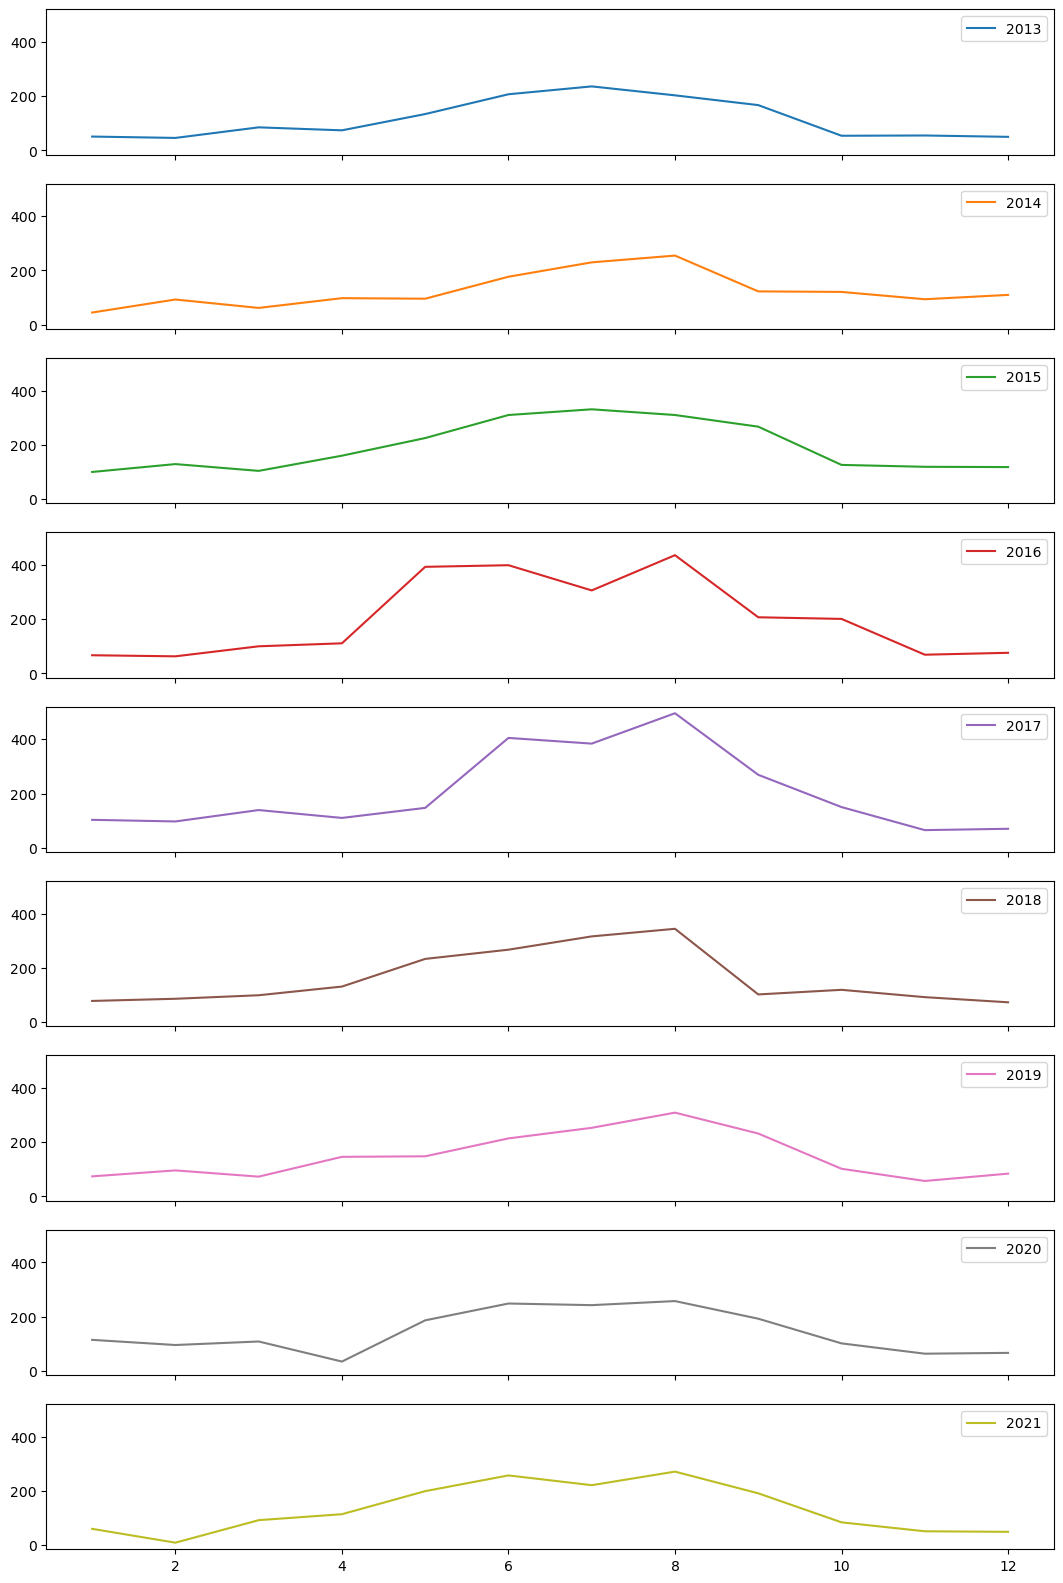

In [44]:
annual_df_indexed.plot(figsize = (13,20), subplots=True, legend=True, sharey=True);

### Test Data

In [45]:
test_year_groups = X_test_months['uid'].groupby(pd.Grouper(freq='A'))

In [46]:
annual_samples_test = {}

for yr, group in test_year_groups:
    annual_samples_test[yr.year] = pd.DataFrame(group.values.ravel(), columns=[yr.year])
    
    
annual_samples_test_df = pd.concat(annual_samples_test.values(), axis=1, )


In [47]:
# setting the index to match month names
annual_df_test_indexed = annual_samples_test_df.set_index(annual_samples_test_df.index+1)

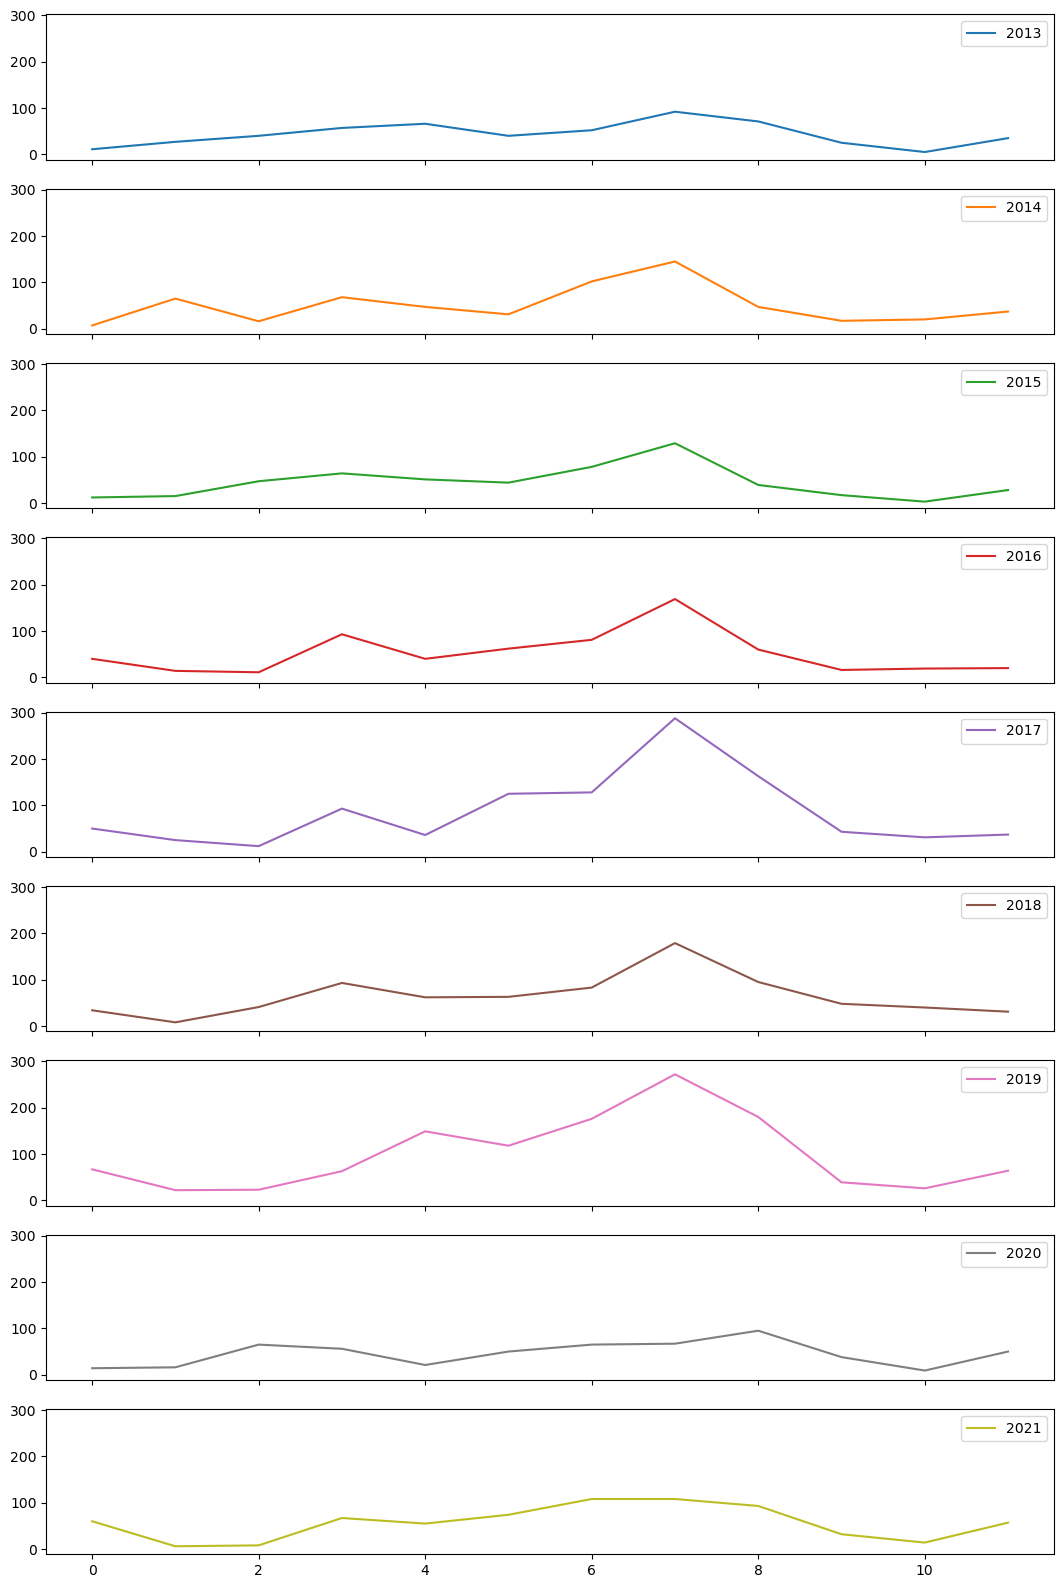

In [48]:
annual_samples_test_df.plot(figsize = (13,20), subplots=True, legend=True, sharey=True);

In [49]:
# total samples in each year
test_total_annual = annual_samples_test_df.sum()
test_total_annual

2013     521
2014     602
2015     527
2016     625
2017    1031
2018     777
2019    1199
2020     546
2021     682
dtype: int64

### Barplot of annual samples

In [50]:
# total samples in each year
train_total_annual = annual_samples_df.sum()
train_total_annual

2013    1362
2014    1504
2015    2299
2016    2428
2017    2435
2018    1940
2019    1788
2020    1706
2021    1598
dtype: int64

In [51]:
# total samples in each year
test_total_annual = annual_samples_test_df.sum()
test_total_annual

2013     521
2014     602
2015     527
2016     625
2017    1031
2018     777
2019    1199
2020     546
2021     682
dtype: int64

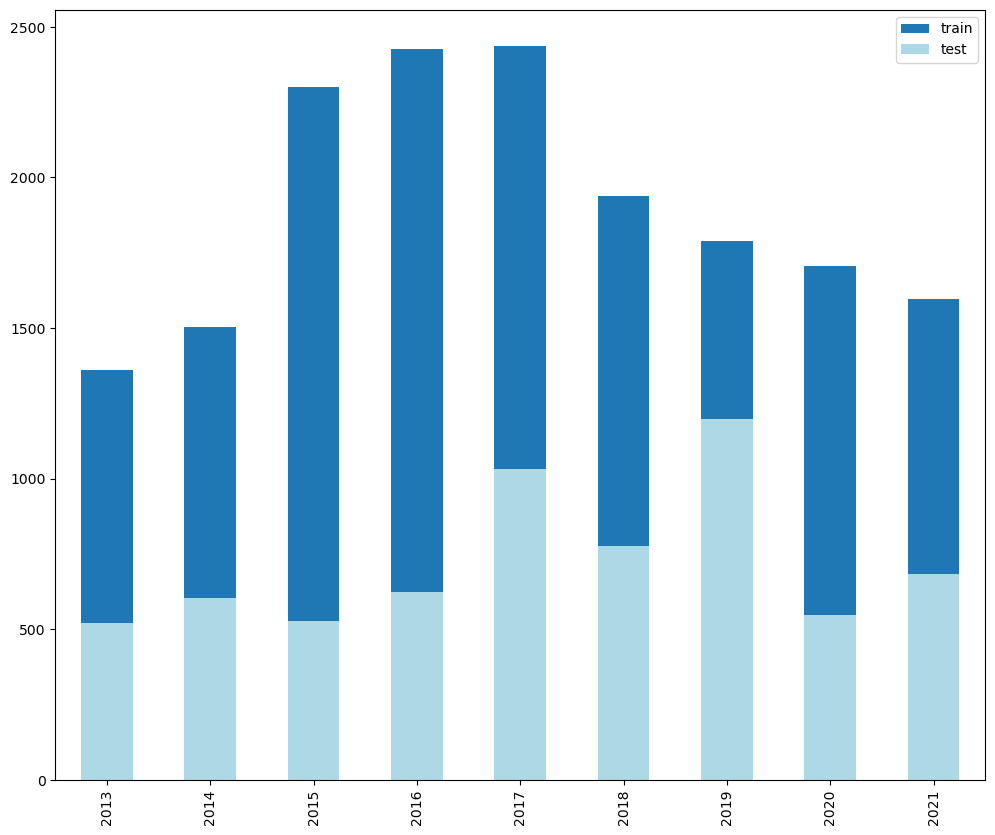

In [52]:
fig, ax = plt.subplots(figsize=(12,10))
train_total_annual.plot(kind='bar', label='train', ax=ax)
test_total_annual.plot(kind='bar', label='test', ax=ax, color='lightblue')
ax.legend();

## Lets look at the other import

## Sat imagery

In [53]:
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1", modifier=pc.sign_inplace
)

Proof of concept to get distances between two points

In [61]:
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(distance.distance(newport_ri, cleveland_oh).miles)


538.3904453677205


Me getting a half mile distance from the test point

In [62]:
# Bounding box must be within (-180, -90, 180, 90)

# So its east, north, west, south?

In [54]:
def create_bbox(coords_df, dist=.5):

    '''
    Input a dataframe that includes lat/long and outputs a list of bbox's for each row 
    '''
    bbox_list = []
#     list_of_coords = list_of_coords.index
    
    for n in range(len(coords_df)):
        coord = coords_df.iloc[n]
        bbox = []
        bbox.append(distance.distance(miles=dist).destination((coord.latitude, coord.longitude), bearing=270)[1])
        bbox.append(distance.distance(miles=dist).destination((coord.latitude, coord.longitude), bearing=180)[0])
        bbox.append(distance.distance(miles=dist).destination((coord.latitude, coord.longitude), bearing=90)[1])
        bbox.append(distance.distance(miles=dist).destination((coord.latitude, coord.longitude), bearing=0)[0])
        bbox_list.append(bbox)
#         bbox_list.append(n)
    coords_df[f"bbox_{dist}_miles"] = bbox_list
    return coords_df

In [55]:
def get_date_range(date_df, range_in_days=15):
    
    '''
    input a dataframe with a date as the index and specify range of dates.
    Will create new column in df that has daterange for sat image pulling.
    '''
    
    range_list = []
    
    for n in date_df.index:
        date = pd.to_datetime(n).strftime(format="%Y-%m-%dT")
        day_range = (n-timedelta(range_in_days)).strftime(format="%Y-%m-%dT")
        final_range = f"{day_range}/{date}"
        
        
        range_list.append(final_range)
    date_df[f"{range_in_days}_date_range"] = range_list
    return date_df

In [56]:
def get_important_info(df, dist=.5, range_in_days=15):
    
    get_date_range(df)
    create_bbox(df)
    return(df)

In [57]:
get_important_info(X_train)

,uid,latitude,longitude,split,geometry,15_date_range,bbox_0.5_miles
date,,,,,,,
2013-01-04,fwbt,44.850500,-93.515700,train,POINT (-93.51570 44.85050),2012-12-20T/2013-01-04T,"[-93.52587907205879, 44.84325910378526, -93.50..."
2013-01-04,guny,44.878889,-93.490833,train,POINT (-93.49083 44.87889),2012-12-20T/2013-01-04T,"[-93.50101707612784, 44.87164813993163, -93.48..."
2013-01-04,gdxr,44.877646,-93.557842,train,POINT (-93.55784 44.87765),2012-12-20T/2013-01-04T,"[-93.56802585687116, 44.870405138348964, -93.5..."
2013-01-04,paev,44.822478,-93.367962,train,POINT (-93.36796 44.82248),2012-12-20T/2013-01-04T,"[-93.37813613996495, 44.81523706810633, -93.35..."
2013-01-04,evep,44.847993,-93.476318,train,POINT (-93.47632 44.84799),2012-12-20T/2013-01-04T,"[-93.48649663051236, 44.840752100593235, -93.4..."
...,...,...,...,...,...,...,...
2021-12-14,tobi,36.030000,-78.705932,train,POINT (-78.70593 36.03000),2021-11-29T/2021-12-14T,"[-78.7148603007586, 36.02274805604769, -78.697..."
2021-12-14,mdcu,35.980000,-78.843884,train,POINT (-78.84388 35.98000),2021-11-29T/2021-12-14T,"[-78.85280649848546, 35.97274799546838, -78.83..."
2021-12-14,hkvs,36.030000,-78.706429,train,POINT (-78.70643 36.03000),2021-11-29T/2021-12-14T,"[-78.71535742448, 36.02274805604769, -78.69750..."


In [58]:
X_train

,uid,latitude,longitude,split,geometry,15_date_range,bbox_0.5_miles
date,,,,,,,
2013-01-04,fwbt,44.850500,-93.515700,train,POINT (-93.51570 44.85050),2012-12-20T/2013-01-04T,"[-93.52587907205879, 44.84325910378526, -93.50..."
2013-01-04,guny,44.878889,-93.490833,train,POINT (-93.49083 44.87889),2012-12-20T/2013-01-04T,"[-93.50101707612784, 44.87164813993163, -93.48..."
2013-01-04,gdxr,44.877646,-93.557842,train,POINT (-93.55784 44.87765),2012-12-20T/2013-01-04T,"[-93.56802585687116, 44.870405138348964, -93.5..."
2013-01-04,paev,44.822478,-93.367962,train,POINT (-93.36796 44.82248),2012-12-20T/2013-01-04T,"[-93.37813613996495, 44.81523706810633, -93.35..."
2013-01-04,evep,44.847993,-93.476318,train,POINT (-93.47632 44.84799),2012-12-20T/2013-01-04T,"[-93.48649663051236, 44.840752100593235, -93.4..."
...,...,...,...,...,...,...,...
2021-12-14,tobi,36.030000,-78.705932,train,POINT (-78.70593 36.03000),2021-11-29T/2021-12-14T,"[-78.7148603007586, 36.02274805604769, -78.697..."
2021-12-14,mdcu,35.980000,-78.843884,train,POINT (-78.84388 35.98000),2021-11-29T/2021-12-14T,"[-78.85280649848546, 35.97274799546838, -78.83..."
2021-12-14,hkvs,36.030000,-78.706429,train,POINT (-78.70643 36.03000),2021-11-29T/2021-12-14T,"[-78.71535742448, 36.02274805604769, -78.69750..."


In [59]:
bbox = X_train['bbox_0.5_miles'][0]

In [60]:
bbox

[-93.52587907205879, 44.84325910378526, -93.5055209279412, 44.85774088699526]

In [63]:
date = X_train['15_date_range'][0]

In [64]:
# search the planetary computer sentinel-l2a and landsat level-2 collections
search = catalog.search(
    collections=["sentinel-2-l2a", "landsat-c2-l2"], bbox=bbox, datetime=date
)

In [65]:
search_dic = search.get_all_items_as_dict()


In [66]:
len(search_dic)

2

In [67]:
search_dic.keys()

dict_keys(['type', 'features'])

In [68]:
search_dic['features'][0]

{'id': 'LE07_L2SP_027029_20121226_02_T2',
 'bbox': [-95.12924581, 43.60162506, -91.96768777, 45.59541494],
 'type': 'Feature',
 'links': [{'rel': 'collection',
   'type': 'application/json',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2'},
  {'rel': 'parent',
   'type': 'application/json',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/'},
  {'rel': 'self',
   'type': 'application/geo+json',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2/items/LE07_L2SP_027029_20121226_02_T2'},
  {'rel': 'cite-as',
   'href': 'https://doi.org/10.5066/P9C7I13B',
   'title': 'Landsat 7 ETM+ Collection 2 Level-2'},
  {'rel': 'via',
   'href': 'https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l2-sr/items/LE07_L2SP_027029_20121226_20200908_02_T2_SR',
 